In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
0,20320744,1150,APARTMENT,APARTMENT,575000,residential_sale,3,160.0,1.0,1.0,40.0,1.0,290.000000,290.000000,1091.083161,2.707052,0.000000,dfGOOD,single
1,20317718,9000,APARTMENT,APARTMENT,390000,residential_sale,3,96.0,1.0,1.0,29.0,1.0,519.796445,519.796445,1091.083161,2.000000,0.000000,AS_NEW,compound
2,20315842,9051,APARTMENT,APARTMENT,260000,residential_sale,1,76.0,1.0,1.0,12.0,1.0,519.796445,519.796445,1091.083161,2.707052,0.048839,GOOD,compound
3,20315799,9051,APARTMENT,APARTMENT,325000,residential_sale,1,81.0,1.0,1.0,13.0,1.0,519.796445,519.796445,1091.083161,2.707052,0.048839,GOOD,compound
4,20315776,9051,APARTMENT,APARTMENT,365000,residential_sale,3,101.0,1.0,1.0,13.0,1.0,519.796445,519.796445,1091.083161,2.707052,0.048839,GOOD,compound


In [54]:
df.dtypes

id                                    int64
Locality                              int64
Type of property                     object
Subtype of property                  object
Price                                 int64
Type of sale                         object
Number of rooms                       int64
Living Area                         float64
Fully equipped kitchen              float64
Terrace                             float64
Terrace area                        float64
Garden                              float64
Garden area                         float64
Surface of the land                 float64
Surface area of the plot of land    float64
Number of facades                   float64
Swimming pool                       float64
State of the building                object
Compound Listing                     object
dtype: object

In [58]:
# number of row and columns
number_of_rows, number_of_columns= df.shape
print(f"number of rows are:{number_of_rows} , number of columns are:{number_of_columns}")

number of rows are:13965 , number of columns are:19


In [59]:
Quantitative=len(df.select_dtypes(include=["float64","int64"]).columns)
Qualitative=len(df.select_dtypes(include=["object"]).columns)
print(f"number of quantitaives are:{Quantitative}, and number of qualtitaives are:{Qualitative}")


number of quantitaives are:14, and number of qualtitaives are:5


# Visualizations

### What is the correlation between the variables and the price

In [60]:
# let's calculate the the correlation matrix
# first let's take only numbers
Quantitative=df.select_dtypes(include=["number"])

correlation_matrix=Quantitative.corr()

# now let's find the correlation between the variables and price
if "Price" in df.columns:
    price_correlation_with_Other_variables=correlation_matrix["Price"]
    print(f"correlation with price \n {price_correlation_with_Other_variables}")


correlation with price 
 id                                 -0.027931
Locality                           -0.023832
Price                               1.000000
Number of rooms                     0.392863
Living Area                         0.472659
Fully equipped kitchen                   NaN
Terrace                                  NaN
Terrace area                        0.103231
Garden                                   NaN
Garden area                         0.129611
Surface of the land                 0.129611
Surface area of the plot of land    0.217075
Number of facades                   0.128878
Swimming pool                       0.211091
Name: Price, dtype: float64


### How are variables correlated to each other?

In [61]:
print("correlation \n",correlation_matrix)

correlation 
                                         id  Locality     Price  \
id                                1.000000 -0.081598 -0.027931   
Locality                         -0.081598  1.000000 -0.023832   
Price                            -0.027931 -0.023832  1.000000   
Number of rooms                   0.087513  0.104522  0.392863   
Living Area                       0.082392  0.061612  0.472659   
Fully equipped kitchen                 NaN       NaN       NaN   
Terrace                                NaN       NaN       NaN   
Terrace area                      0.013929  0.017622  0.103231   
Garden                                 NaN       NaN       NaN   
Garden area                       0.003840  0.016377  0.129611   
Surface of the land               0.003840  0.016377  0.129611   
Surface area of the plot of land -0.006360  0.012804  0.217075   
Number of facades                 0.031761  0.096892  0.128878   
Swimming pool                     0.018000  0.052172  0.211091

### Which variables have the greatest influence on the price

In [62]:
# let's calculate the the correlation matrix
# first let's take only numbers
Quantitative=df.select_dtypes(include=["number"])

correlation_matrix=Quantitative.corr()

# now let's find the correlation between the variables and price
if "Price" in df.columns:
    price_correlation_with_Other_variables=correlation_matrix["Price"]
    top_coorelated = price_correlation_with_Other_variables.abs().sort_values(ascending=False)
    print(f"top correlated variables with price \n {top_coorelated}")

top correlated variables with price 
 Price                               1.000000
Living Area                         0.472659
Number of rooms                     0.392863
Surface area of the plot of land    0.217075
Swimming pool                       0.211091
Surface of the land                 0.129611
Garden area                         0.129611
Number of facades                   0.128878
Terrace area                        0.103231
id                                  0.027931
Locality                            0.023832
Fully equipped kitchen                   NaN
Terrace                                  NaN
Garden                                   NaN
Name: Price, dtype: float64


In [63]:
# now let's find the correlation between the variables and price
if "Price" in df.columns:
    price_correlation_with_Other_variables=correlation_matrix["Price"]
    top_coorelated = price_correlation_with_Other_variables.abs().sort_values(ascending=True)
    print(f"the least correlated variables with price \n {top_coorelated}")

the least correlated variables with price 
 Locality                            0.023832
id                                  0.027931
Terrace area                        0.103231
Number of facades                   0.128878
Surface of the land                 0.129611
Garden area                         0.129611
Swimming pool                       0.211091
Surface area of the plot of land    0.217075
Number of rooms                     0.392863
Living Area                         0.472659
Price                               1.000000
Fully equipped kitchen                   NaN
Terrace                                  NaN
Garden                                   NaN
Name: Price, dtype: float64


### How many qualitative and quantitative variables are there

number of quantitatives are:14, number of qualitatives are: 5


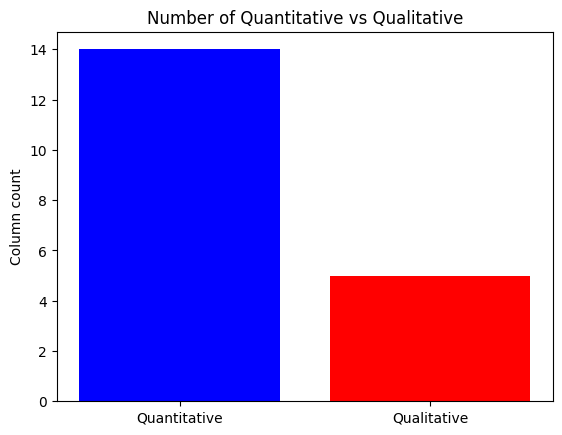

In [65]:
Quantitative=len(df.select_dtypes(include=["float64","int64"]).columns)
Qualitative=len(df.select_dtypes(include=["object"]).columns)

print(f"number of quantitatives are:{Quantitative}, number of qualitatives are: {Qualitative}")
variables = ['Quantitative', 'Qualitative']
counts = [Quantitative, Qualitative]
fig, ax = plt.subplots()
ax.bar(variables, counts, color=['blue', 'red'])
ax.set_ylabel('Column count')
ax.set_title('Number of Quantitative vs Qualitative')
plt.show()

### How would you transform these values into numerical values?

### Percentage of missing values per column

In [44]:
missing_percentage = df.isnull().mean() * 100
print(f"percentage of missing value per column: {missing_percentage}")

percentage of missing value per column: id                                  0.0
Locality                            0.0
Type of property                    0.0
Subtype of property                 0.0
Price                               0.0
Type of sale                        0.0
Number of rooms                     0.0
Living Area                         0.0
Fully equipped kitchen              0.0
Terrace                             0.0
Terrace area                        0.0
Garden                              0.0
Garden area                         0.0
Surface of the land                 0.0
Surface area of the plot of land    0.0
Number of facades                   0.0
Swimming pool                       0.0
State of the building               0.0
Compound Listing                    0.0
dtype: float64
